<a href="https://colab.research.google.com/github/lanashin/CST2312/blob/main/hw2viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  
import numpy as np  

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

In [2]:
# the data is loaded localy 
df = pd.read_csv("https://raw.githubusercontent.com/lanashin/Data_Viz/main/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
len(df)

8807

In [4]:
df.query('release_year >= 2000', inplace = True)

In [5]:
len(df)

8282

In [6]:
df.query('rating == "G" or rating == "PG"  or rating == "R"  or rating == "PG-13"', inplace = True)

In [7]:
len(df)

1374

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...


In [9]:
new_df = df.pivot_table(values='show_id', index='rating', columns='release_year', aggfunc='count', fill_value=0)
new_df

release_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
rating,,,,,,,,,,,,,,,,,,,,,
G,2,2,0,0,3,2,0,1,0,4,...,0,0,2,0,3,1,2,1,1,0
PG,4,5,4,5,8,5,8,10,10,10,...,7,14,15,11,14,15,31,12,15,11
PG-13,10,8,14,10,7,16,15,15,24,25,...,19,15,19,25,34,32,30,19,21,14
R,8,14,12,16,7,10,12,14,19,25,...,29,41,49,67,86,73,52,39,48,21


In [10]:
data = df['release_year']
bins = np.arange(min(data), max(data) + 1, 1)
bins

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

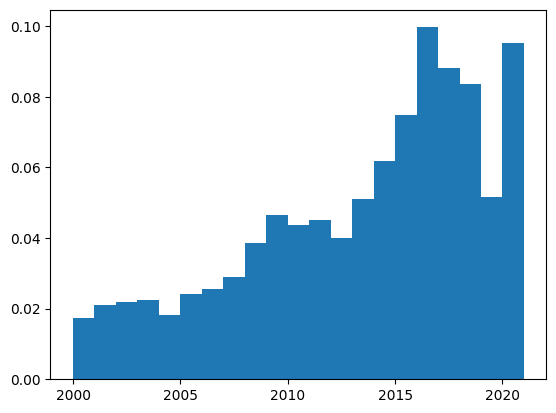

In [11]:
data = df['release_year']

plt.hist(data, bins = bins, density = True)
#plt.hist(data, bins = bins, density = False)

plt.show()

In [12]:
sum_row = new_df.sum(axis=1)
sum_row

rating
G         25
PG       240
PG-13    421
R        688
dtype: int64

In [13]:
new_df["sum_row"] = sum_row

In [14]:
new_df

release_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,sum_row
rating,,,,,,,,,,,,,,,,,,,,,
G,2,2,0,0,3,2,0,1,0,4,...,0,2,0,3,1,2,1,1,0,25
PG,4,5,4,5,8,5,8,10,10,10,...,14,15,11,14,15,31,12,15,11,240
PG-13,10,8,14,10,7,16,15,15,24,25,...,15,19,25,34,32,30,19,21,14,421
R,8,14,12,16,7,10,12,14,19,25,...,41,49,67,86,73,52,39,48,21,688


In [15]:
flattened = pd.DataFrame(new_df.to_records())
flattened

,rating,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,sum_row
0,G,2,2,0,0,3,2,0,1,0,...,0,2,0,3,1,2,1,1,0,25
1,PG,4,5,4,5,8,5,8,10,10,...,14,15,11,14,15,31,12,15,11,240
2,PG-13,10,8,14,10,7,16,15,15,24,...,15,19,25,34,32,30,19,21,14,421
3,R,8,14,12,16,7,10,12,14,19,...,41,49,67,86,73,52,39,48,21,688


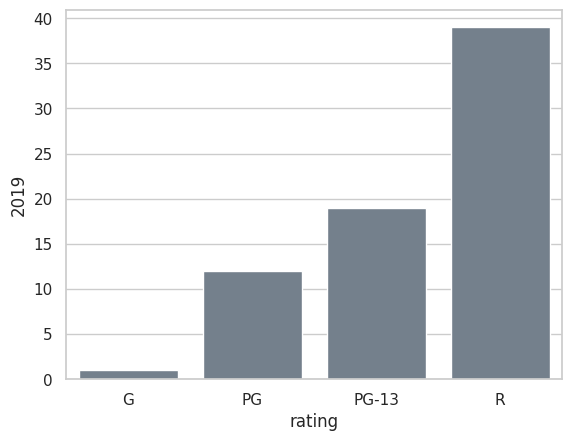

In [16]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="rating", y = "2019", data=flattened, color="slategrey")

In [17]:
df.query('release_year >= 2017', inplace = True)

In [18]:
new_data=df.groupby(['rating','release_year']).count().reset_index()
features=['rating', 'release_year','show_id']
new_data=new_data[features]
new_data

,rating,release_year,show_id
0,G,2017,1
1,G,2018,2
2,G,2019,1
3,G,2020,1
4,PG,2017,15
5,PG,2018,31
6,PG,2019,12
7,PG,2020,15
8,PG,2021,11
9,PG-13,2017,32


<ipython-input-19-263256645666>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(


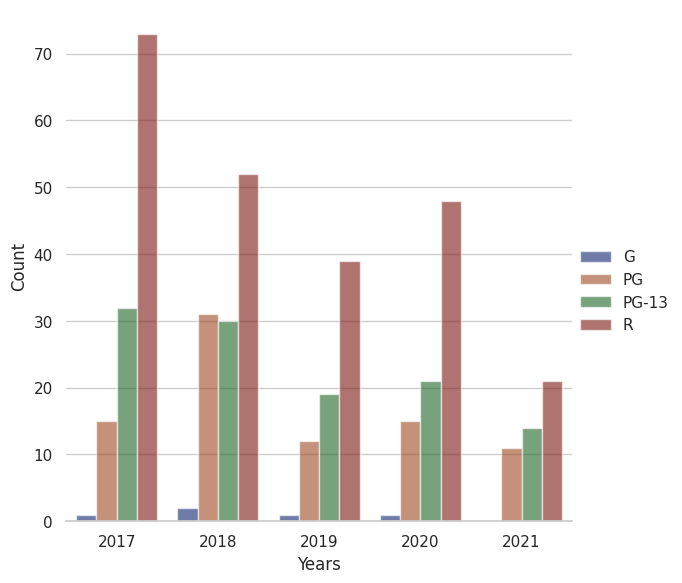

In [19]:
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# using seaborn
g = sns.catplot(
    data=new_data, kind="bar",
    x="release_year", y="show_id", hue="rating",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Years", "Count")
g.legend.set_title("")